<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Parallel_model%2C_simpson's_paradox%2C_multiple_lr_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)

# import dataset (mpg)

In [ ]:
mpg_df = mpg

manufacturer
manufacturer name

model
model name

displ
engine displacement, in litres

year
year of manufacture

cyl
number of cylinders

trans
type of transmission

drv
the type of drive train, where f = front-wheel drive, r = rear wheel drive, 4 = 4wd

cty
city miles per gallon

hwy
highway miles per gallon

fl
fuel type

class
"type" of car

In [ ]:
str(mpg_df)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


# EDA

## Engine displ and miles per gallon

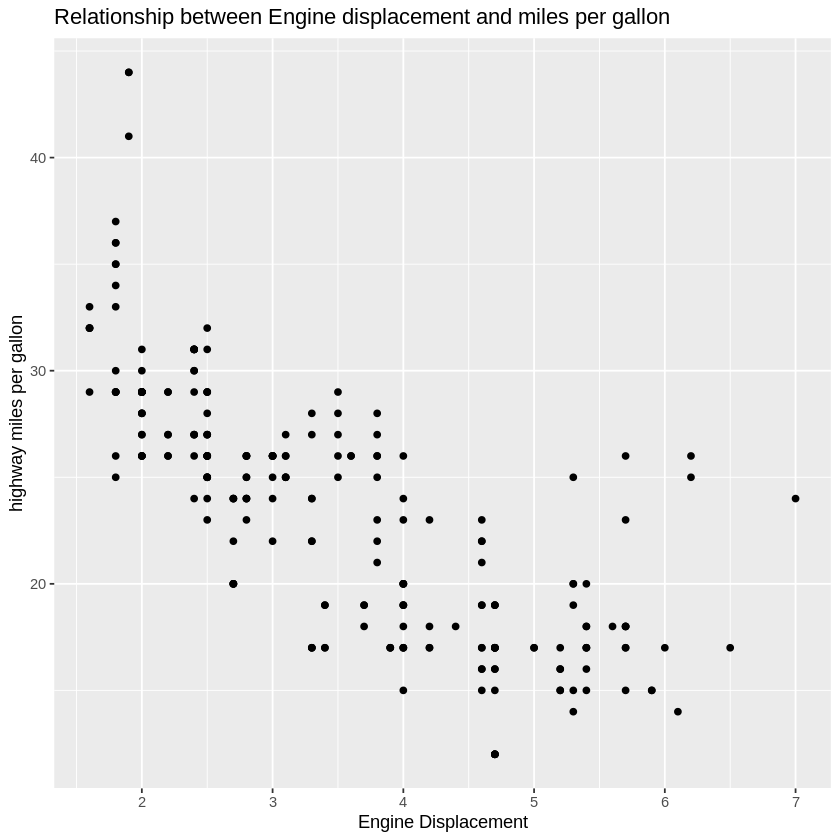

In [ ]:
# Plot relationship between Engine displacement and miles per gallon.
ggplot(data= mpg_df, aes(x= displ , y= hwy)) + 
  geom_point() +
  labs(x='Engine Displacement', y= 'highway miles per gallon', title='Relationship between Engine displacement and miles per gallon')

Because the data has observations for only 2 years 1999 and 2008 (categorical) we will color by this factor.



## A parallel slope model.

We compute a model for y variable as a function of quantitative x1 **and a qualitative x2** predictive variable.

In [ ]:
# We need to encode year as a categorical variable.
mpg_df$year = factor(mpg_df$year)

# Make the linear model:  y ~ x1 + x2
model_displ_year = lm(hwy ~ displ + year, data= mpg_df)
model_displ_year


Call:
lm(formula = hwy ~ displ + year, data = mpg_df)

Coefficients:
(Intercept)        displ     year2008  
     35.276       -3.611        1.402  


### Model interpretation

The expected highway miles per gallon is 1.402 more than cars in 1999 with the same number of engine displacement.

For every engine displacement, the model outputs a higher milage per gallon for newer cars. This implies an 'improvement' in ratio distance/consumption.

From the linear model we can also interpret that for every increase in engine displacement size, highway miles per gallon decreases 3.611, regardless if the car is from 1999 or 2008.

In [ ]:
# Augment model from broom, to find .fitter values and make a df
aug_model = augment(model_displ_year)
head(aug_model, 3)

hwy,displ,year,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,1.8,1999,28.77593,0.2240692,0.01431427,3.788588,1.725274e-05,0.0597000
29,1.8,1999,28.77593,0.2240692,0.01431427,3.788588,1.725274e-05,0.0597000
31,2.0,2008,29.45587,1.5441298,0.01581161,3.787227,9.077971e-04,0.4117239


### plot scatter and parallel model

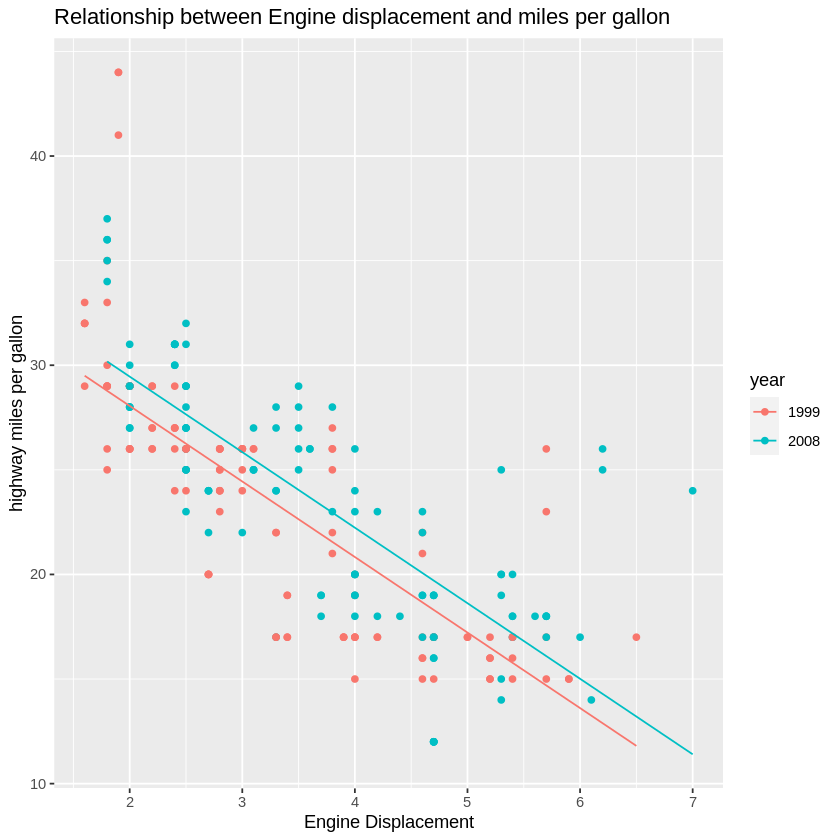

In [ ]:
# Plot parallel model
ggplot(data= aug_model, aes(x= displ , y= hwy, color=year)) + 
  geom_point() +
  geom_line(data=aug_model, aes(y= .fitted)) +
  labs(x='Engine Displacement', y= 'highway miles per gallon', title='Relationship between Engine displacement and miles per gallon')

### New car observation, predict hwy

There is a new car with engine 1.8, from 2008. 

In [ ]:
new_obs = data.frame(displ = 1.8, year = factor(2008))

augment(model_displ_year, newdata=new_obs)

displ,year,.fitted
<dbl>,<fct>,<dbl>
1.8,2008,30.17807


### Model summary

In [ ]:
summary(model_displ_year)


Call:
lm(formula = hwy ~ displ + year, data = mpg_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7616 -2.5187 -0.2899  1.8701 15.5852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.2757     0.7257  48.610  < 2e-16 ***
displ        -3.6110     0.1938 -18.630  < 2e-16 ***
year2008      1.4021     0.4998   2.806  0.00545 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.78 on 231 degrees of freedom
Multiple R-squared:  0.6004,	Adjusted R-squared:  0.5969 
F-statistic: 173.5 on 2 and 231 DF,  p-value: < 2.2e-16


This model has R2 of around 0.6 and adjusted r2 of 0.597 which means high bias.

## A non-parallel slope model by year as color.

`geom_smooth()` using formula 'y ~ x'



$x
[1] "Engine Displacement"

$y
[1] "highway miles per gallon"

$title
[1] "Relationship between Engine displacement and miles per gallon"

attr(,"class")
[1] "labels"

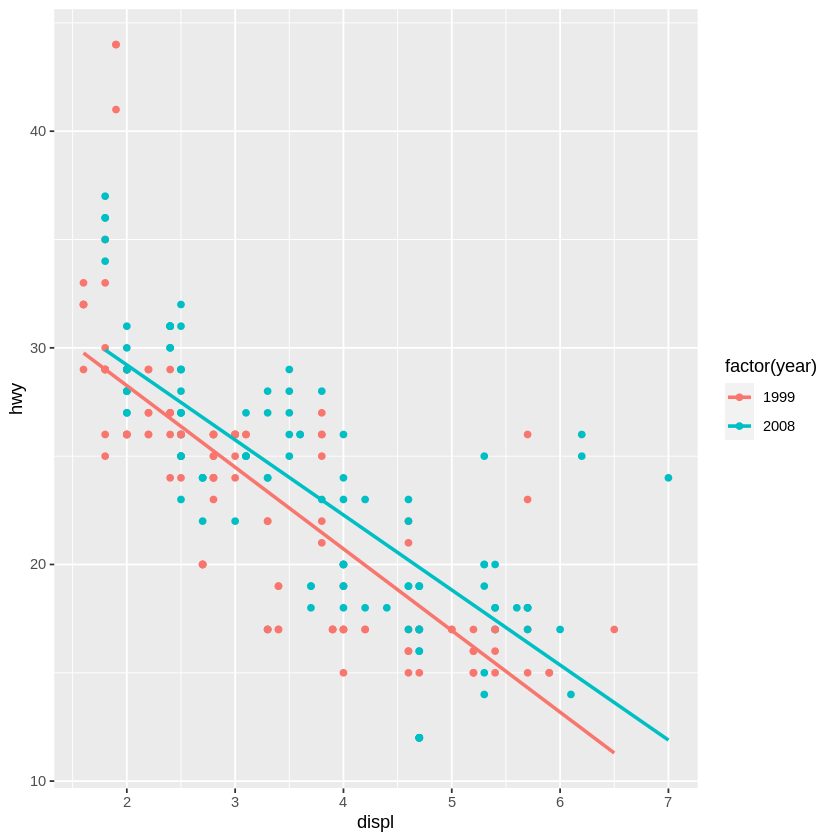

In [ ]:
# Plot relationship between Engine displacement and miles per gallon.
ggplot(data= mpg_df, aes(x= displ , y= hwy, color=factor(year))) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)
  labs(x='Engine Displacement', y= 'highway miles per gallon', title='Relationship between Engine displacement and miles per gallon')

To plot those non-parallel linear models, ggplot additions a new predictor: the interaction between engine displacement and year.

The difference in slope for cars of year 1999 means they decrease more rapidly as a function of engine size. The models suggests newer cars have better engineering in consumption efficiency. 

Next, i'll compute this model with a new independent variable of displ multiplied by year.

In R the use of the colon (:) here means that the interaction between  and  will be a third term in the model. (displ:year)

In [ ]:
non_par_model = lm(hwy ~ displ + year + displ:year, data= mpg_df)
non_par_model


Call:
lm(formula = hwy ~ displ + year + displ:year, data = mpg_df)

Coefficients:
   (Intercept)           displ        year2008  displ:year2008  
       35.7922         -3.7684          0.3445          0.3052  


displ:year2008 displays a difference in slope that **may not be statistical significant.** before making conclusions, in this case we would need to run hypothesis testing to test this significance.

# Simpson's paradox

In [ ]:
# Install
install.packages("UsingR")
library(UsingR)

## Import SAT dataframe

In [ ]:
# Import SAT df and assign into sat
sat = SAT
str(sat)

'data.frame':	50 obs. of  8 variables:
 $ state : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ expend: num  4.41 8.96 4.78 4.46 4.99 ...
 $ ratio : num  17.2 17.6 19.3 17.1 24 18.4 14.4 16.6 19.1 16.3 ...
 $ salary: num  31.1 48 32.2 28.9 41.1 ...
 $ perc  : int  8 47 27 6 45 29 81 68 48 65 ...
 $ verbal: int  491 445 448 482 417 462 431 429 420 406 ...
 $ math  : int  538 489 496 523 485 518 477 468 469 448 ...
 $ total : int  1029 934 944 1005 902 980 908 897 889 854 ...


`geom_smooth()` using formula 'y ~ x'



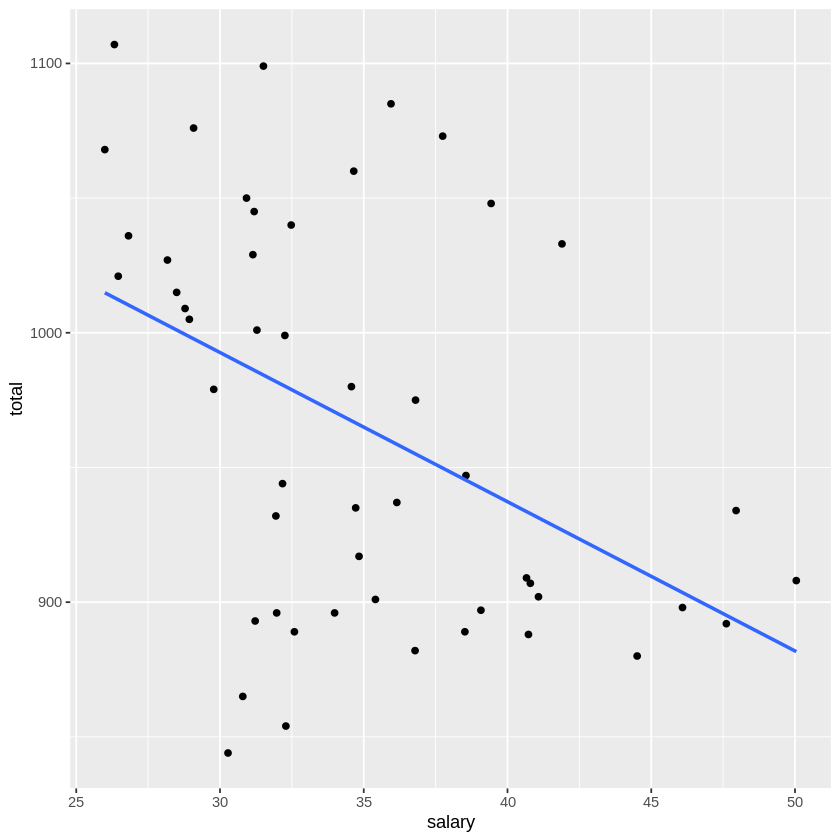

In [ ]:
# We plot salary vs SAT avg score
ggplot(data=sat, aes(x=salary, y=total)) + 
  geom_point() + 
  geom_smooth(method='lm', se=FALSE)

### Model with negative slope?

This model suggests that institutions that pays higher salaries to their teachers on average are associated with lower student performance!. 

This fenomenon occurs widely in social and natural sciences!!

Simpsons paradox occurs when group membership is really important, and becomes a confounder if not segmented. It must be controlled for in order to build an appropiate model. 

## Build a parallel model with controling perc variable

In [ ]:
sat_bin_df = sat%>%
  mutate(sat_bin = cut(perc, 3))

# Create a model with perc of students taking the exam as second predictor
model_sat = lm(formula= total ~ salary + sat_bin, data=sat_bin_df)
model_sat


Call:
lm(formula = total ~ salary + sat_bin, data = sat_bin_df)

Coefficients:
       (Intercept)              salary  sat_bin(29.7,55.3]  sat_bin(55.3,81.1]  
         1000.7173              0.8697           -116.3174           -143.5428  


This model suggests that for every additional thousand dollars of salary for teachers in a particular state, the expected SAT score for a student from that state is about 0.8697 points higher, after controlling for the percentage of students taking the SAT.

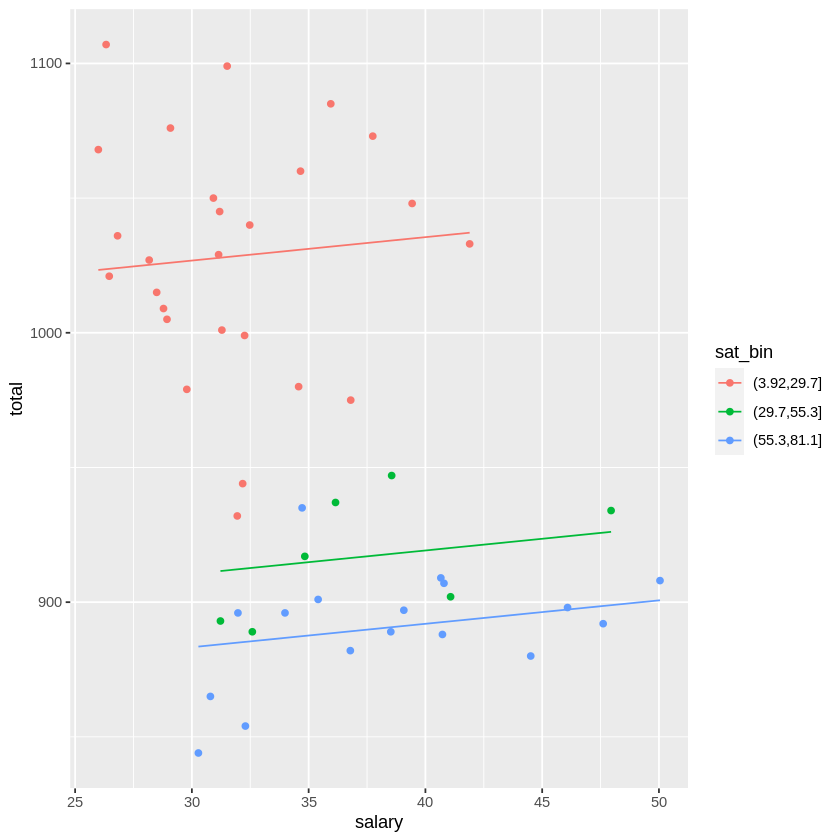

In [ ]:
# We plot salary vs SAT avg score with perc_bins!
ggplot(data=sat_bin_df, aes(x=salary, y=total, color=sat_bin)) + 
  geom_point() + 
  geom_line(data= augment(model_sat), aes(y=.fitted))

# Multiple linear regression

In [ ]:
str(mpg_df)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : Factor w/ 2 levels "1999","2008": 1 1 2 2 1 1 2 1 1 2 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [ ]:
# Add another numerical variable cylinder
multiple_model = lm(hwy ~ displ + cyl, data= mpg_df)
multiple_model


Call:
lm(formula = hwy ~ displ + cyl, data = mpg_df)

Coefficients:
(Intercept)        displ          cyl  
     38.216       -1.960       -1.354  


Both slopes are negative.

Slopes are read like this: For each additional engine displacement size, the expected highway miles per gallon declines by 1.96, **after controlling for cylinder.**

In [ ]:
# use ~ .  to use all features in the data frame and - to skip a specific one.
all_model = lm(hwy ~ . -manufacturer-model-fl-class-drv , data= mpg_df)
all_model


Call:
lm(formula = hwy ~ . - manufacturer - model - fl - class - drv, 
    data = mpg_df)

Coefficients:
    (Intercept)            displ         year2008              cyl  
         0.7749          -0.3601          -0.1152           0.2495  
  transauto(l3)    transauto(l4)    transauto(l5)    transauto(l6)  
        -2.2558          -0.4114           0.0104           0.8014  
  transauto(s4)    transauto(s5)    transauto(s6)  transmanual(m5)  
        -0.1888           1.2246           0.8952          -0.6109  
transmanual(m6)              cty  
         0.6539           1.3447  


# Logistic Regression

A modeling framework exists that generalizes regression to include response variables that are non-normally distributed. 

This family is called GLM(generalized linear models). One member of GLMs is called Logistic Regression where models have binary response.

In [ ]:
# Install
install.packages("Stat2Data")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('Stat2Data')

In [ ]:
gpa = MedGPA
head(gpa)

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


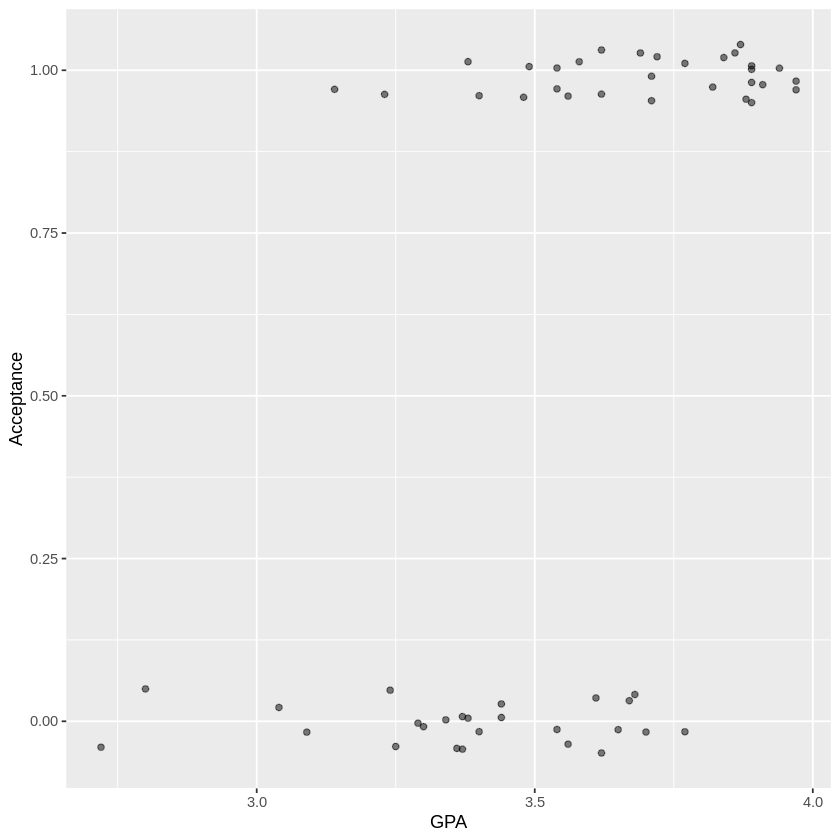

In [ ]:
# scatterplot with jitter
data_space <- ggplot(data = gpa, aes(y = Acceptance, x = GPA)) + 
  geom_jitter(width = 0, height = 0.05, alpha = 0.5)

data_space

## Plot for GPAs between 3.375 and 3.770

Logistic Regression formula:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>log</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mrow>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mfrac>
        <mi>y</mi>
        <mrow>
          <mn>1</mn>
          <mo>&#x2212;</mo>
          <mi>y</mi>
        </mrow>
      </mfrac>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
  </mrow>
  <mo>=</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <mo>&#x22C5;</mo>
  <mi>x</mi>
  <mo>+</mo>
  <mi>&#x3F5;</mi>
  <mstyle scriptlevel="0">
    <mspace width="thinmathspace"></mspace>
  </mstyle>
  <mo>,</mo>
</math>

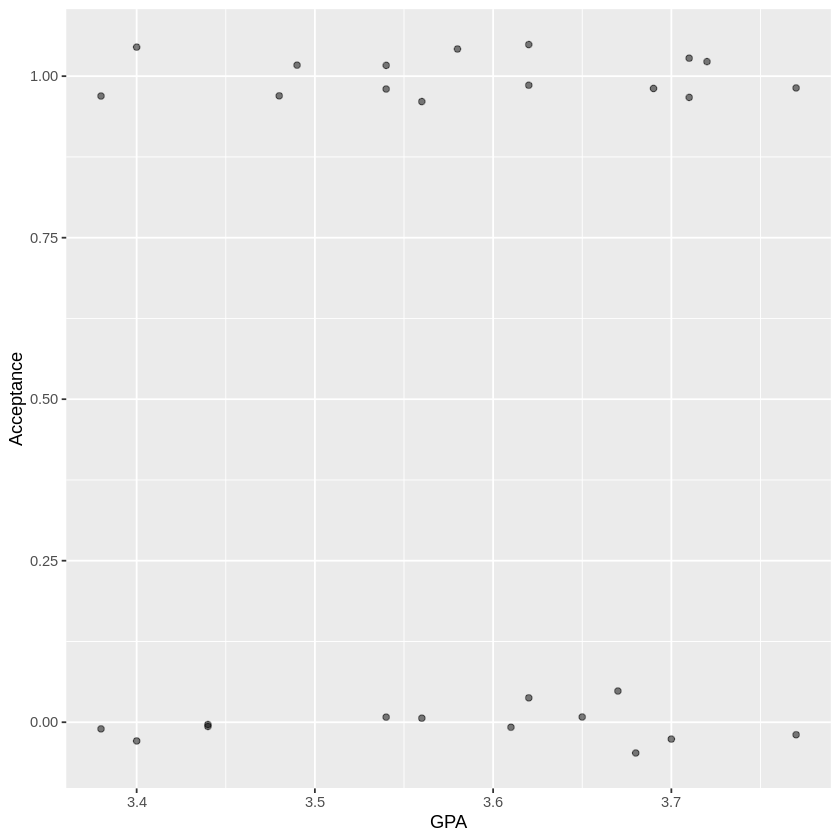

In [ ]:
# filter
gpa_middle <- gpa %>%
  filter(GPA >= 3.375, GPA <= 3.770)

# scatterplot filtered with jitter
ggplot(data = gpa_middle, aes(y = Acceptance, x = GPA)) + 
  geom_jitter(width = 0, height = 0.05, alpha = 0.5)


## Logistic regression plot

`geom_smooth()` using formula 'y ~ x'



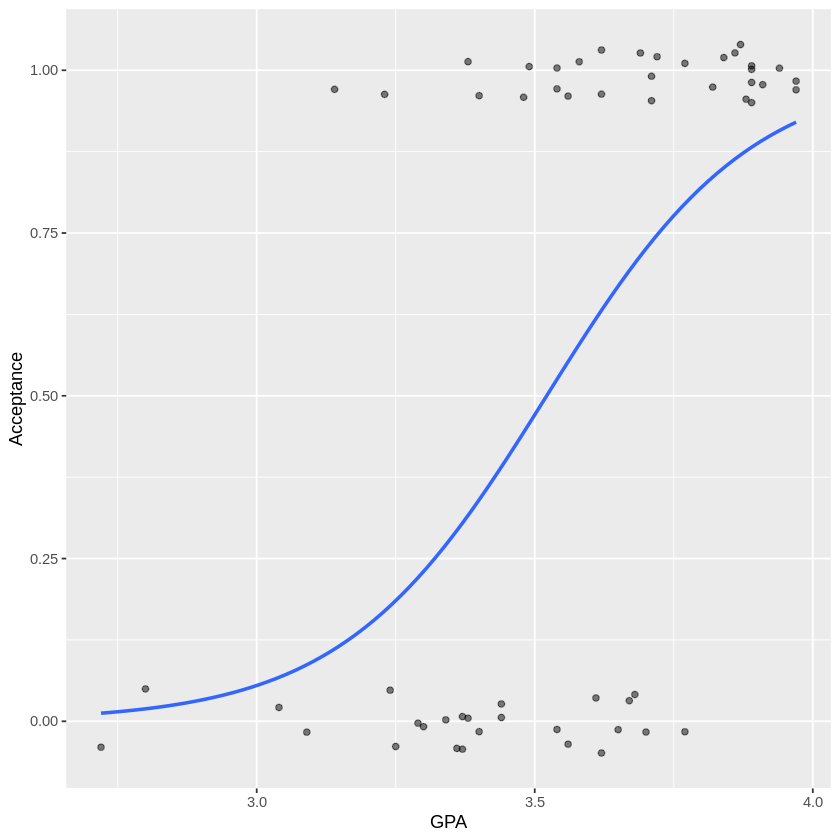

In [ ]:
# add logistic curve
data_space +
  geom_smooth(method = "glm", se = FALSE, method.args = list(family = "binomial"))

## Model calculation

In [ ]:
# fit model
glm(Acceptance ~ GPA, data = gpa, family = binomial)


Call:  glm(formula = Acceptance ~ GPA, family = binomial, data = gpa)

Coefficients:
(Intercept)          GPA  
    -19.207        5.454  

Degrees of Freedom: 54 Total (i.e. Null);  53 Residual
Null Deviance:	    75.79 
Residual Deviance: 56.84 	AIC: 60.84